<a href="https://colab.research.google.com/github/Titankhoa/ThucHanhXuLyAnhSo/blob/main/LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THỰC HÀNH 5: XÁC ĐỊNH ĐỐI TƯỢNG TRONG ẢNH

1. CÀI ĐẶT THƯ VIỆN

In [ ]:
pip install opencv-python

2. VIẾT CHƯƠNG TRÌNH GÁN NHÃN ẢNH


2.1 GÁN NHÃN ẢNH


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving geometric.png to geometric.png


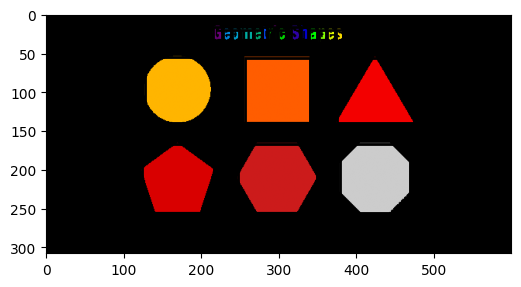

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

# Đọc ảnh và chuyển sang grayscale
data = Image.open('geometric.png').convert('L')
a = np.asarray(data)

# Ngưỡng Otsu
thres = threshold_otsu(a)
b = a > thres

# Gán nhãn các vùng
c = label(b)

# Lưu ảnh gán nhãn dưới dạng PNG
iio.imsave('label_output.png', c.astype(np.uint8))

# Phân tích từng vùng
d = regionprops(c)

# Vẽ kết quả
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='nipy_spectral')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rect = mpatches.Rectangle((lc, lr), uc - lc, ur - lr, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)

plt.show()


2.2 DÒ TÌM CẠNH THEO CHIỀU DỌC

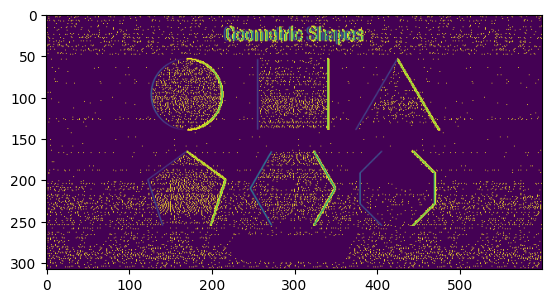

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data-nd.shift (data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

2.3 DÒ TÌM CẠNH VỚI SOBEL FILTER

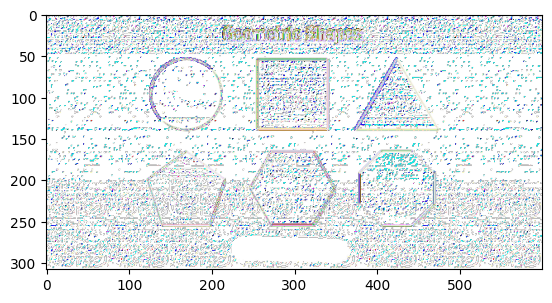

In [ ]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel (data, axis=0)
b = nd.sobel (data, axis=1)
bmg = abs (a) + abs (b)
plt.imshow(bmg)
plt.show()

2.4 XÁC ĐỊNH GÓC CỦA ĐỐI TƯỢNG

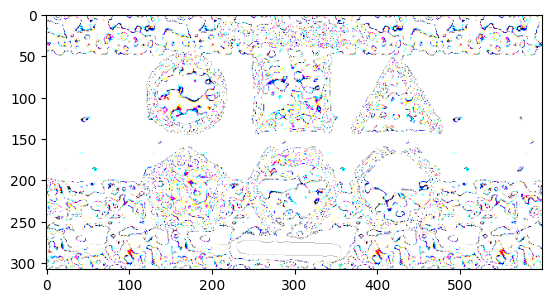

In [ ]:

from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris (indata, alpha=0.2):
  x = nd.sobel (indata, 0)
  y = nd.sobel (indata, 1)
  xl = x ** 2
  yl = y ** 2
  xy = abs(x * y)
  xl = nd.gaussian_filter(xl,3)
  yl = nd.gaussian_filter(yl,3)
  xy = nd.gaussian_filter(xy, 3)

  detC = xl * yl - 2 * xy
  trC = xl + yl
  R= detC - alpha * trC**2
  return R

data = Image.open('geometric.png')
bmg = Harris (data)
plt.imshow(bmg)
plt.show()

2.5 DÒ TÌM HÌNH DẠNG CỤ THỂ TRONG ẢNH VỚI HOUGH TRANSFORM

2.5.1 DÒ TÌM ĐƯỜNG THẲNG TRONG ẢNH

In [ ]:

import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough (data, gamma):
  V, H= data.shape
  R = int (np.sqrt(V * V + H* H))|
ho= np.zeros((R, 90), float) #Hough space W = data + 0
ok = 1
theta = np.arange(90)/180.0* np.pi
tp = np.arange(90).astype (float)
while ok:
mx w.max()
if mx < gamma: ok = 0
else:
v,h divmod (w.argmax(), H)
y = V - v
x = h
rh = x * np.cos (theta) + y * np.sin(theta) for i in range (len (rh)):
if 0 <= rh[i] < R and 0 <= tp[i] < 90: ho[int (rh[i]), int(tp[i])] += mx
w[v,h] = 0
return ho
data= np.zeros((256, 256))
data[128, 128] = 1
bmg LineHough (data, 0.5)
plt.imshow (bmg)
plt.show()

2.6 -	Tìm điểm cần so sánh (Harris Corner Detector)